In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\nitza\anaconda3\lib\site-packages (0.11.2)


In [2]:
!pip install --user sidetable
import sidetable

In [3]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
english_stemmer = SnowballStemmer('english')
wordnet_lemma = WordNetLemmatizer()
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from functools import reduce

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Integrated Project

### Project Description:
The online store *Ice*, sells video games all over the world. \
User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.

**Project goal**: identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

## Open the data file and study the general information

### store it in designated variable

In [4]:
try:
    games = pd.read_csv("games.csv" , encoding = "ISO-8859-1")
except:
    games = pd.read_csv('/datasets/games.csv')

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
games.tail()
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15562,Kazoku Keikaku,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
12763,Hakuoki: Stories of the Shinsengumi,PS3,2010.0,Adventure,0.03,0.00,0.03,0.01,NaN,6.5,M
6204,Real Pool,PS2,2000.0,Sports,0.14,0.11,0.00,0.04,54.0,tbd,E
14637,Gekiatsu!! Pachi Game Tamashi Vol. 1: CR Evang...,PSP,2011.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14932,Wand of Fortune 2: Jikuu ni Shizumu Mokushiroku,PSP,2011.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3261,Dragon Quest Monsters: Joker 2 Professional,DS,2011.0,Role-Playing,0.00,0.00,0.62,0.00,NaN,NaN,NaN
577,Medal of Honor Heroes,PSP,2006.0,Shooter,0.86,1.11,0.01,0.66,71.0,7.9,T
7514,Sengoku Basara 2 Heroes,PS2,2007.0,Action,0.00,0.00,0.20,0.00,NaN,NaN,NaN
12246,WipEout HD Fury,PS3,2009.0,Racing,0.00,0.05,0.00,0.01,89.0,8.4,E10+
6213,Madagascar,XB,2005.0,Platform,0.21,0.06,0.00,0.01,71.0,tbd,E10+


In [8]:
# What is the rate of null values for each column?
# Using sidetable
games.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


In [9]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
games.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [11]:
games.duplicated().sum()

0

### Summary:

- There are 16,715 rows in the file. each one representד a game & specific platform
- There is high rate of missing values in the rating columns: "Critic_Score", "User_Score","Rating" (51%, 40%, 40% respectivly)
- There are also aroung 1.6% missing values in "Year_of_Release", and very few in "Name" and "Genre" columns.
- There are no duplicate rows

## Prepare The Data
### Replace the column names to lowercase

In [12]:
games.rename(columns=lambda x: x.lower(), inplace=True)

### Handle missing values

#### Name:

In [13]:
# let's look at the 2 rows where 'name' is missing
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# I don't see any source which I can take the name from, so I will fill the name with "Unknowen"
games['name'].fillna('Unknowen',inplace=True)

#### Genre:

In [15]:
# let's look at the 2 rows where 'genre' is missing
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknowen,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknowen,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
# These are the same rows with missing values at the name column (now 'Unknowen'). they also don't have score and rating data,
# They will be relevant only for analysing platform sales over the years. I will fill the missing values in 'genre' with 'Unknowen'
games['genre'].fillna('Unknowen',inplace=True)

#### Year_of_release: 
- We have 269 rows with NaN value in year_of_release.
- In some of the cases of missing years we can extract the year from the name of the game. it will fill 12 rows, which does not worth the time it will take
- Regarding the rest, I will fill it with 0, so I will be able to filter them when I need to analyse by year_of_release

In [17]:
# I will fill the missing values with 0
games['year_of_release'].fillna(0,inplace=True)
games['year_of_release'].isnull().sum()

0

#### Critic_score, User score & Rating

Regarding the scoring columns, critic_score, user_acore and rating - I assume that missing values stands for games that still didn't get a score from critics/users/ESRB. for these we can aim to take the score from games in the same genre/year, but that would be preaty weak. each game is unique in its story, and the scor is very subjective, so it can't be determined from other columns. 

In [18]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [19]:
# I want to check my assumption that the games with missing scores are from the last years.
games[games['critic_score'].isnull()]['year_of_release'].value_counts()

2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
1999.0    299
2005.0    284
1997.0    272
2013.0    271
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2002.0    202
2004.0    201
2003.0    190
2001.0    156
1994.0    120
0.0       115
1993.0     62
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1989.0     17
1983.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: year_of_release, dtype: int64

In [20]:
#My assumption was wrong. many games with no scoreing are from old years,many of them are from the years 2007-2011.
#It may indicate that our data is not updated.
#I wiil fill the missing score with 0
games['critic_score'].fillna(0,inplace=True)

In [21]:
# I want to check my assumption that the games with 'tbd' value are from the last years.
games[games['user_score'] == 'tbd']['year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2007.0    192
2002.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
0.0        48
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

In [22]:
# Same as with the 'critic_score', 'tbd' exists both in nearly years released games, and older ones. 
# I will fill the missing values in 'user_score' with 0, and also replace 'tbd' by 0.
games['user_score'].fillna(0,inplace=True)
games.loc[games['user_score'] == 'tbd',['user_score']] = 0

In [23]:
games['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [24]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
# I will fill 'rating' missing values with 'Unknowen'
games['rating'].fillna('Unknowen',inplace=True)

### Convert the data to the required types

- year_of_release - Need to convert from float to int data type, we don't need the decimal point
- critic_score - Need to convert from float to int data type - the rating is in whole numbers 
- user_score - Need to convert from object to float data type, the rating have decimal numbers

In [26]:
games['year_of_release'] = games['year_of_release'].astype('int32')
games['critic_score'] = games['critic_score'].astype('int32')
games['user_score'] = games['user_score'].astype('float64') 

In [27]:
# I would like to learn more about the nature of the data in these columns:
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


### Calculate the total sales for each game

In [29]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [30]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Unknowen,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Unknowen,31.38


## Analyse The Data

###  Look at how many games were released in different years.

In [31]:
games_by_year = games.groupby(['year_of_release'])['name'].count().reset_index().sort_values(by=['year_of_release'])
games_by_year = games_by_year[games_by_year['year_of_release'] != 0] # Ignore the games with missing year of release 
games_by_year

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


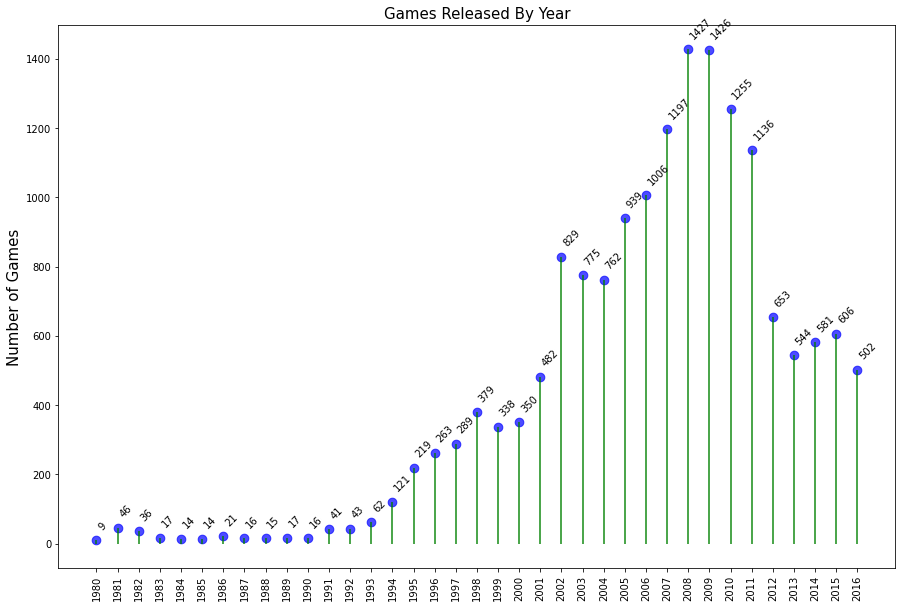

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

ax.vlines(x=games_by_year.year_of_release, ymin=0, ymax=games_by_year.name,color='green', alpha=0.7,linewidth=2)
ax.scatter(x=games_by_year.year_of_release, y=games_by_year.name, s=75,color='blue', alpha=0.7)
ax.set_title("Games Released By Year", fontdict = {'size':15});
ax.set_ylabel("Number of Games", fontdict = {'size':15});
ax.set_xticks(games_by_year.year_of_release);
ax.set_xticklabels(games_by_year.year_of_release,rotation=90);

for row in games_by_year.itertuples():
    ax.text(row.year_of_release,row.name+30,s=round(row.name,2),rotation = 45)

#### Is the data for every period significant?
- The data for the years 1980 - until around 1994 isn't significant, since the number of games release at these years is very low (less then 100).
- From 1995 until 2000 we can see a growing, but still, the numbers are significantly lower than what we see in the last 10 years of the data we have. 
- The big jumps in number of new games seen at the begining of the 2000's, could represent technological jump in the gaming industry.
- Starting from 2010 we see a decrease in the number of new games released every year, which is droping dramtically between 2011 and 2012. My hypothesis is that the industry changed from many small games market into more consolidated market around some big hits. 

###  Look at how sales varied from platform to platform.

In [33]:
sales_by_platform = games.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by=['total_sales'])
sales_by_platform

,platform,total_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.86
3,DC,15.95
8,GEN,30.77
21,SAT,33.59


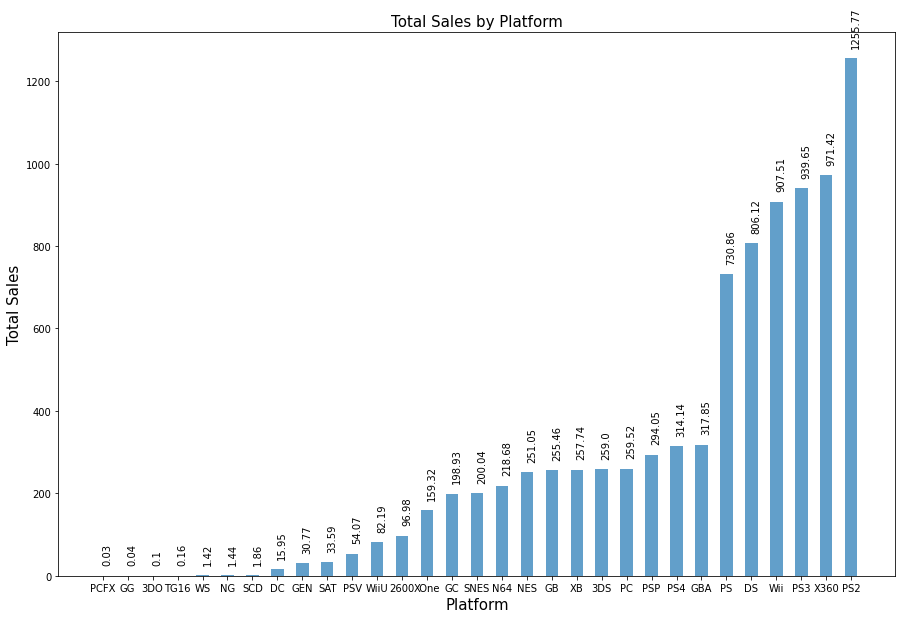

In [34]:
fig,ax = plt.subplots(figsize=(15,10))
plt.bar(sales_by_platform.platform, sales_by_platform.total_sales,width =0.5 , alpha=0.7)

plt.title("Total Sales by Platform", fontdict = {'size':15});
plt.ylabel('Total Sales', fontdict = {'size':15})
plt.xlabel('Platform', fontdict = {'size':15})
for row in sales_by_platform.itertuples():
    plt.text(row.platform,row.total_sales+30,s=round(row.total_sales,2),rotation = 90)

In [35]:
# For each platform, I want to calculate z-score, which indicate how it is located in relation to the avarage total sales
sales_by_platform['sales_z'] = (sales_by_platform['total_sales']- sales_by_platform['total_sales'].mean())/sales_by_platform['total_sales'].std()
sales_by_platform['colors'] = ['red' if x<0 else 'green' for x in sales_by_platform['sales_z']]
sales_by_platform

,platform,total_sales,sales_z,colors
14,PCFX,0.03,-0.825980,red
9,GG,0.04,-0.825952,red
1,3DO,0.10,-0.825779,red
24,TG16,0.16,-0.825607,red
25,WS,1.42,-0.821988,red
12,NG,1.44,-0.821931,red
22,SCD,1.86,-0.820724,red
3,DC,15.95,-0.780254,red
8,GEN,30.77,-0.737688,red
21,SAT,33.59,-0.729588,red


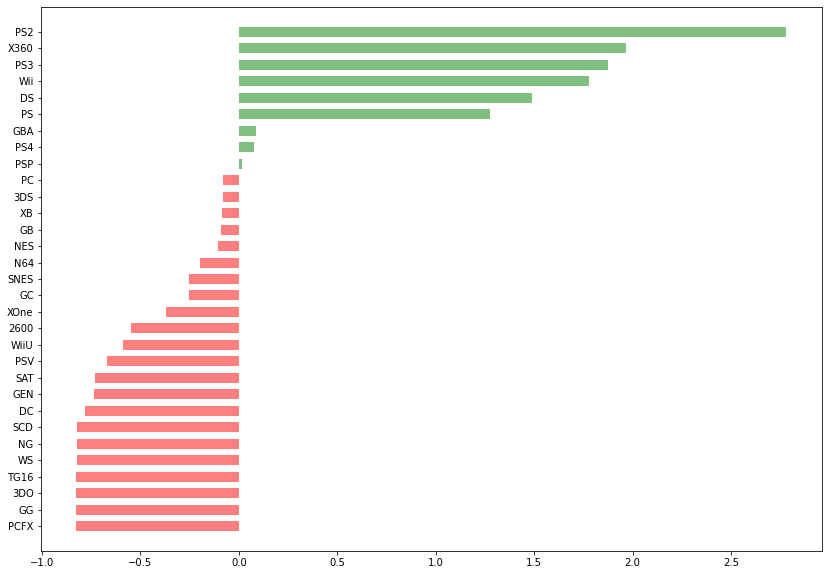

In [36]:
# This figure illustrate very clear, where each platform is located in relation to the avarage.
plt.figure(figsize=(14,10))
plt.hlines(y=sales_by_platform['platform'],xmin=0,xmax=sales_by_platform['sales_z'],color=sales_by_platform['colors'],alpha=0.5,linewidth=10);

###  Choose the platforms with the greatest total sales and build a distribution based on data for each year.

- I will choose the 6 highest sales platforms which have Z score above 1: (PS2, X360, PS3, Wii, DS, PS)

In [37]:
top_6 = sales_by_platform['platform'][sales_by_platform['sales_z'] > 1]
top_6

15      PS
4       DS
26     Wii
17     PS3
28    X360
16     PS2
Name: platform, dtype: object

In [38]:
#Top 6 platforms sales by year
sales_by_year = games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by=['year_of_release'])
sales_by_year = sales_by_year[sales_by_year['year_of_release'] != 0] # Ignore the games with missing year of release 
sales_by_year

,platform,year_of_release,total_sales
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
84,NES,1983,10.96
4,2600,1983,5.84
...,...,...,...
167,PS4,2016,69.25
163,PS3,2016,3.60
19,3DS,2016,15.14
239,X360,2016,1.52


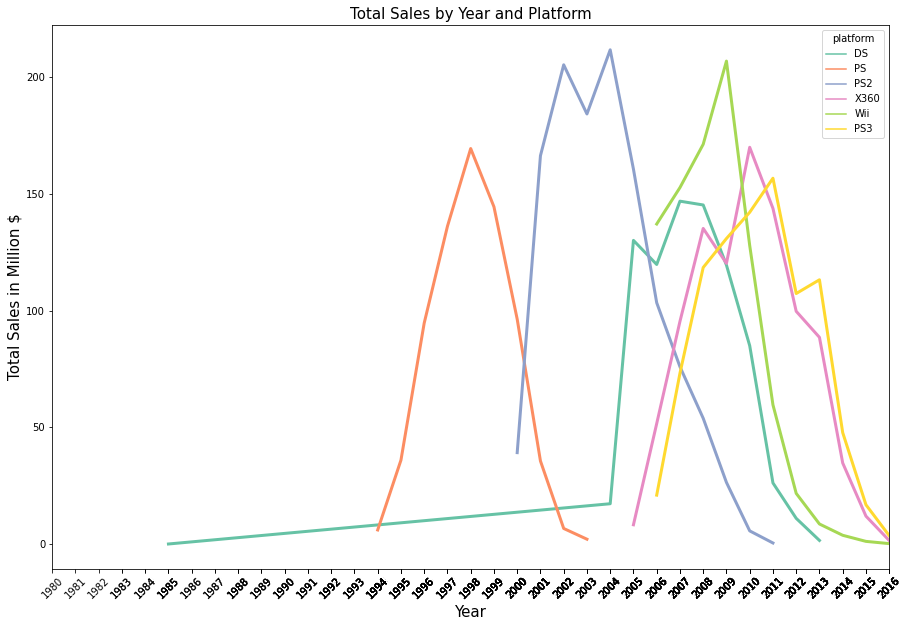

In [39]:
plt.figure(figsize=(15,10))

lp = sns.lineplot(data = sales_by_year.query('platform in @top_6'),x='year_of_release',y='total_sales',hue='platform', linewidth=3, palette="Set2")                  

axes = lp.axes
axes.set_xlim(1985, 2016)
axes.set_title("Total Sales by Year and Platform", fontdict = {'size':15});
axes.set_xlabel('Year', fontdict = {'size':15})
axes.set_ylabel('Total Sales in Million $', fontdict = {'size':15})
axes.set_xticks(sales_by_year.year_of_release);
axes.set_xticklabels(sales_by_year.year_of_release,rotation=45);

###  Find platforms that used to be popular but now have zero sales. 
- How long does it generally take for new platforms to appear and old ones to fade?

#### Conclusions:

- All the 6 platform I choosed for analysing, having the highest total sales, used to be popular and their sales drop to 0 
- The cycle from appearing to fading generally takes about 10-11 years as can be concluded from our 6 top platforms graph. exceptional is DS, which lives almost 30 years, with low sales at it's first 20 years, and then it started to behave like the other platforms, with a cycle of 10 years of rising popularity until fading. 

### Determine what period you should take data for. 
- To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

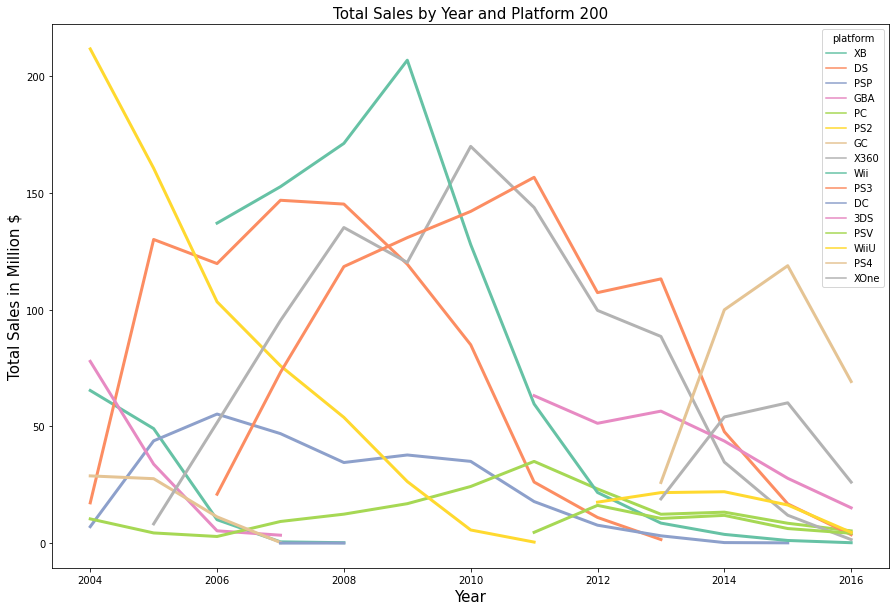

In [40]:
# I would like to see a graph of sales of all platform over the last 10 years
plt.figure(figsize=(15,10))
axes.set_xlim(2007)
lp = sns.lineplot(data = sales_by_year.query('year_of_release >= 2004'),x='year_of_release',y='total_sales',hue='platform', linewidth=3, palette="Set2")                  

axes.set_xticks(sales_by_year.year_of_release);
axes.set_xticklabels(sales_by_year.year_of_release,rotation=45);
axes = lp.axes
axes.set_title("Total Sales by Year and Platform 200", fontdict = {'size':15});
axes.set_xlabel('Year', fontdict = {'size':15})
axes.set_ylabel('Total Sales in Million $', fontdict = {'size':15});

#### Conclusions:

In order to build prognosis for 2017, I can take data from the last 4 years (2013-2016). this period will allow me to conclude in what phase the platform stands now - rising or decreasing popularity. since we have to predict only 1 year ahead, it will be enough to check the trend according to the changes from year to year in the last 4 years.

###  Which platforms are leading in sales? Which ones are growing or shrinking? 
- Select several potentially profitable platforms.

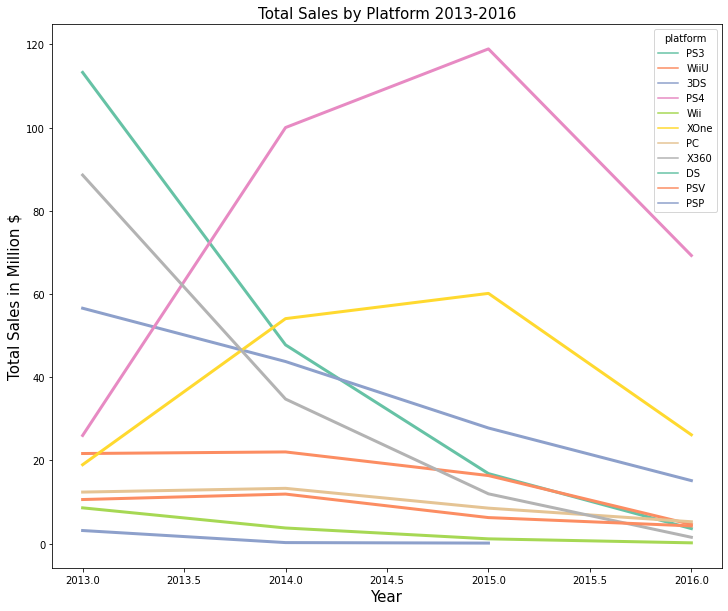

In [41]:
plt.figure(figsize=(12,10))
axes.set_xlim(2013,2016)
lp = sns.lineplot(data = sales_by_year.query('year_of_release >= 2013'),x='year_of_release',y='total_sales',hue='platform', linewidth=3, palette="Set2")



axes.set_xticks(sales_by_year.year_of_release);
axes.set_xticklabels(sales_by_year.year_of_release,rotation=45);
axes = lp.axes
axes.set_xlabel('Year', fontdict = {'size':15})
axes.set_ylabel('Total Sales in Million $', fontdict = {'size':15})
axes.set_title("Total Sales by Platform 2013-2016", fontdict = {'size':15});

In [42]:
sales_new = sales_by_year[sales_by_year['year_of_release'] >= 2013]
df_2013=pd.pivot_table(data=sales_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df_2013.T

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,0.00,0.00,0.00
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,0.00
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


In [43]:
sales_2000 = sales_by_year[sales_by_year['year_of_release'] >= 2000]
df_2000=pd.pivot_table(data=sales_2000,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df_2000

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2000,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2001,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2004,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2005,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.00,0.00,43.84,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2006,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,20.96,0.00,55.32,0.00,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.02,146.94,0.00,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.00,0.00,0.00,0.00,12.42,0.00,53.90,118.52,0.00,34.55,0.00,0.00,171.32,0.00,135.26,0.18,0.00


In [44]:
df_2000.shift(+1)

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2002,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2003,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2004,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2005,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2006,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.00,0.00,43.84,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2007,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,20.96,0.00,55.32,0.00,0.00,137.15,0.00,51.62,10.04,0.00
2008,0.00,0.02,146.94,0.00,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,0.00,152.77,0.00,95.41,0.55,0.00


In [45]:
dynamics= df_2000 - df_2000.shift(+1)
dynamics

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,0.00,-4.92,0.00,-10.52,61.46,26.34,-30.72,0.81,-60.78,127.26,0.00,0.00,0.00,0.00,-0.40,0.00,0.00,0.00,21.27,0.00
2002,0.00,-0.78,0.00,-9.24,12.63,25.47,-3.17,3.10,-28.92,38.95,0.00,0.00,0.00,0.00,-0.28,0.00,0.00,0.00,25.75,0.00
2003,0.00,-0.29,0.00,0.00,-17.49,-1.20,-0.08,0.27,-4.60,-21.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.03,0.00
2004,0.00,0.00,17.27,0.00,21.24,-21.79,0.00,1.55,-2.07,27.50,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,10.38,0.00
2005,0.00,0.00,112.87,0.00,-44.05,-1.20,0.00,-6.02,0.00,-51.15,0.00,0.00,36.78,0.00,0.00,0.00,0.00,8.25,-16.34,0.00
2006,0.00,0.00,-10.33,0.00,-28.58,-16.36,0.00,-1.52,0.00,-57.24,20.96,0.00,11.48,0.00,0.00,137.15,0.00,43.37,-39.04,0.00
2007,0.00,0.02,27.13,0.00,-1.88,-10.99,0.00,6.43,0.00,-27.43,52.23,0.00,-8.39,0.00,0.00,15.62,0.00,43.79,-9.49,0.00
2008,0.00,0.02,-1.63,0.00,-3.40,-0.27,0.00,3.14,0.00,-22.09,45.33,0.00,-12.38,0.00,0.00,18.55,0.00,39.85,-0.37,0.00


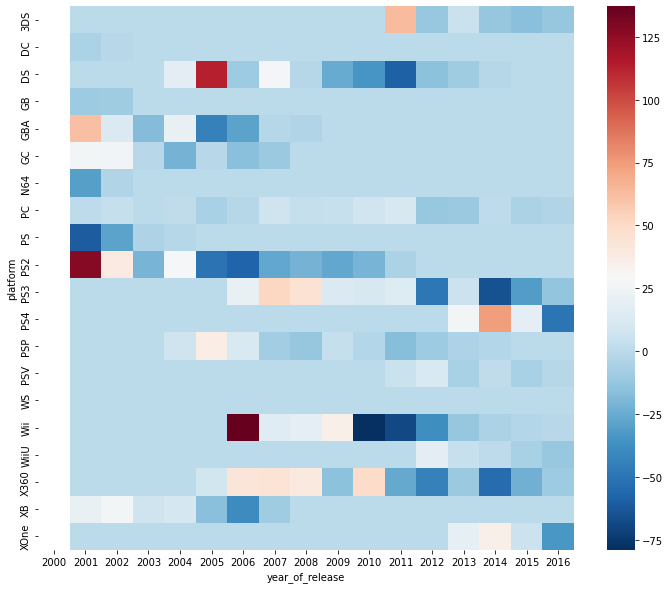

In [46]:
# Plot heatmap to show Y by Y increase/decrease in sales
plt.figure(figsize=(12,10))
sns.heatmap(dynamics.T,cmap = 'RdBu_r');

#### Conclusion:

- PS4 (69 M dollar) and XOne (26 M dollar) are leading in sales since 2014 (3DS is in the 3'rd place with 15 M dollar sales in 2016)
- All platforms are presenting decrease in sales between 2015 and 2016. for all the platforms except PS4 and XOne, the decrease began earlier

###  Build a box plot for the global sales of all games, broken down by platform.

In [47]:
# Data for analysis from 2013
games_2013 = games.query('year_of_release >= 2013')
games_2013.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,Unknowen,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,Unknowen,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,Unknowen,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,0,0.0,Unknowen,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


In [48]:
platforms_total_sales = games_2013.groupby('platform')['total_sales'].sum().sort_values().index
games_2013.groupby('platform')['total_sales'].sum().sort_values()

platform
DS        1.54
PSP       3.50
Wii      13.66
PSV      32.99
PC       39.43
WiiU     64.63
X360    136.80
3DS     143.25
XOne    159.32
PS3     181.43
PS4     314.14
Name: total_sales, dtype: float64

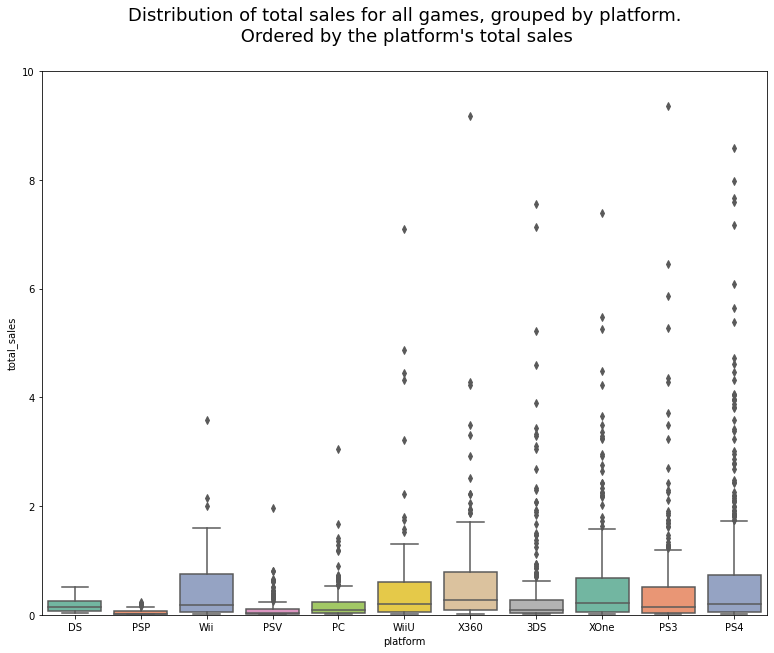

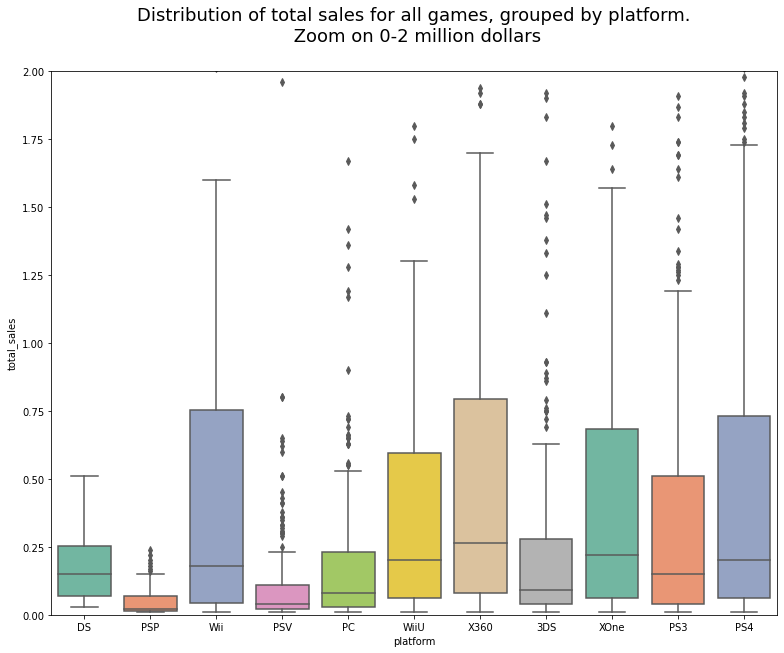

In [49]:
plt.figure(figsize=(13, 10))
ax = sns.boxplot(
    x="platform",
    y="total_sales",
    data=games_2013,
    palette="Set2",
    order=platforms_total_sales
)

title = f"Distribution of total sales for all games," \
f" grouped by platform.\n Ordered by the platform's total sales"
plt.title(title,size=18,pad=30);
plt.ylim(0, 10)
plt.show()

plt.figure(figsize=(13, 10))
ax = sns.boxplot(
    x="platform",
    y="total_sales",
    data=games_2013,
    palette="Set2",
    order=platforms_total_sales
)

print()
title = f"Distribution of total sales for all games," \
f" grouped by platform.\n Zoom on 0-2 million dollars"
plt.title(title,size=18,pad=30);
plt.ylim(0, 2)
plt.show()

###  Are the differences in sales significant?

- Median: From the graphs I draw (I choosed to plot 2 graphs: one with range of 0-10 million dollar sales, which includes most of the outliers, and one with 0-2 million), we can't see a significant difference in the median of games' total sales between the platforms. almost all platforms medians are under 0.25 (X360 is a little above), which means that at least half of the games have total sales under 0.25. 
- The big difference is in the dispersion of the data: as the platform go higher in total sales, the box interquartile range becomes wider, and there are many outliers (games that fall out of the upper whisker and represents "blockbuster" games), as we can see in the upper graph. these are the games that pull the average and total sales of the paltforms up.

### What about average sales on various platforms? Describe your findings

In [50]:
# group by platform
platforms_avg_sales = games_2013.groupby('platform')['total_sales'].mean().sort_values().reset_index()
ordered = platforms_avg_sales['platform']

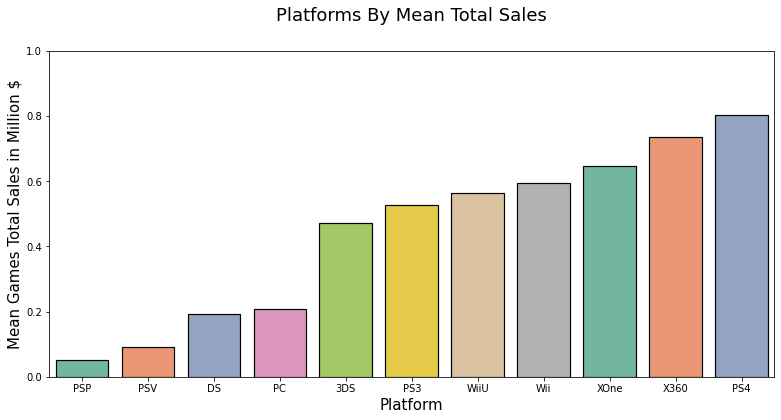

In [51]:
print()
plt.figure(figsize=(13,6))
sns.barplot(
    x='platform',
    y='total_sales',
    data=platforms_avg_sales,
    order=ordered,
    palette="Set2",
    edgecolor='k',
    lw=1.2
)
title = f"Platforms By Mean Total Sales"
plt.title(
    title,
    size=18,
    pad=30,
);
plt.ylim(0, 1)
plt.ylabel('Mean Games Total Sales in Million $', fontdict = {'size':15})
plt.xlabel('Platform', fontdict = {'size':15})
plt.show()

- We can see from the above graph that the avarage total sales of games is varied btween the platform. and - as the platform is ranked higher in total sales, the avarage sales for game is higher. It supports the assumption that strong games (blockbusters), influence the avarage and the total sales of the platform 

###  Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
- Build a scatter plot and calculate the correlation between reviews and sales.
- Draw conclusions.

- I'll do the analysis on X360 Platform. I choosed this platform because it has a full life cycle (from 2006 until 2016), and was quite popular. It will give me a wide scale of games and time.
- Foe this reason I am taking data from all years, not just 2013 and above.
- I have to remove 0 scores (which I filled in the missing values)

In [52]:
score_data = games.query('critic_score !=0 & user_score !=0')
platform_data = score_data.loc[score_data['platform'] == 'X360']

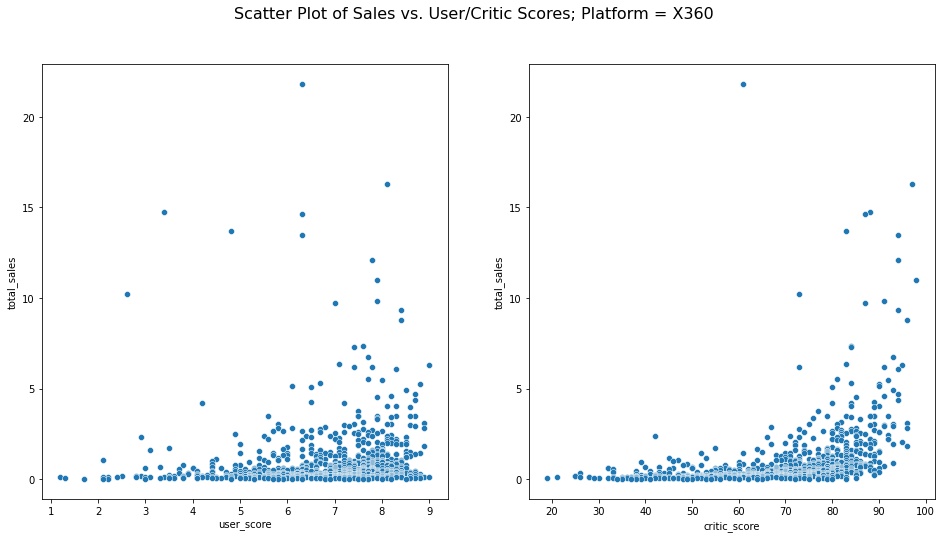

The correlation between user_score and total sales is: 0.11
The correlation between critic_score and total sales is: 0.39


In [53]:
#build scatter plot
fig, ax = plt.subplots(1, 2,figsize=(16,8))
fig.suptitle("Scatter Plot of Sales vs. User/Critic Scores; Platform = X360", fontsize=16)

sns.scatterplot(x='user_score', y="total_sales", data=platform_data,ax=ax[0])
sns.scatterplot(x='critic_score', y="total_sales", data=platform_data,ax=ax[1])    
plt.show()
#Calculate correlations and print results
print('The correlation between user_score and total sales is: {:.2f}'.format(platform_data['user_score'].corr(platform_data['total_sales'])))
print('The correlation between critic_score and total sales is: {:.2f}'.format(platform_data['critic_score'].corr(platform_data['total_sales'])))  

#### Conclusions:
- Both the scatter plot and the calculated correlation does not show strong correlation between the scores and the sales. critic score has medium positive correlation (0.39) then user score (0.11) has week positive correlation.
- In the graphs we can see high number of games which had high scores but this didn't impact their sales.
- The critic score graph shows that almost all games with sales above 5 million, recived score above 70 (except from the best seller...)
- In the user score graph we can see top saling games with low rating as 3 and 4.
- A possible explanation to the difference in correlation could be that proffetionals' score has more impact, since customer appreciate it. it is more solid and based on set of parameters. In contrast to users' score, which is much more subjective.

###  Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- I am running the plot and correlations on the other 5 platforms from the top 6 I defined earlier.

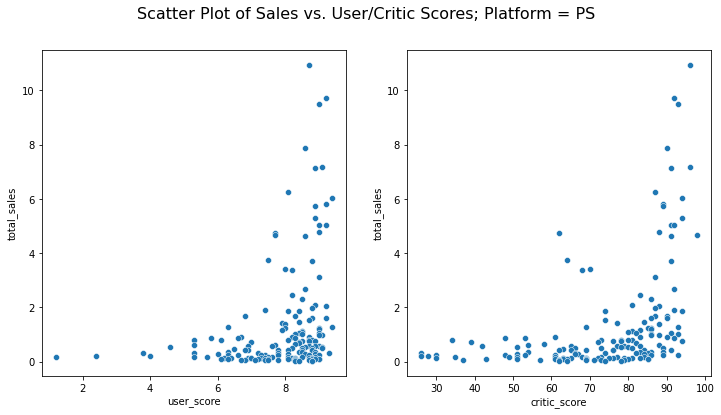

The correlation between user_score and total sales is: 0.30
The correlation between critic_score and total sales is: 0.43


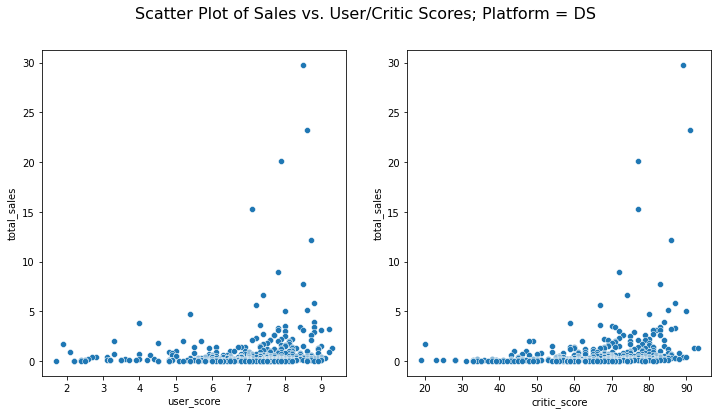

The correlation between user_score and total sales is: 0.14
The correlation between critic_score and total sales is: 0.23


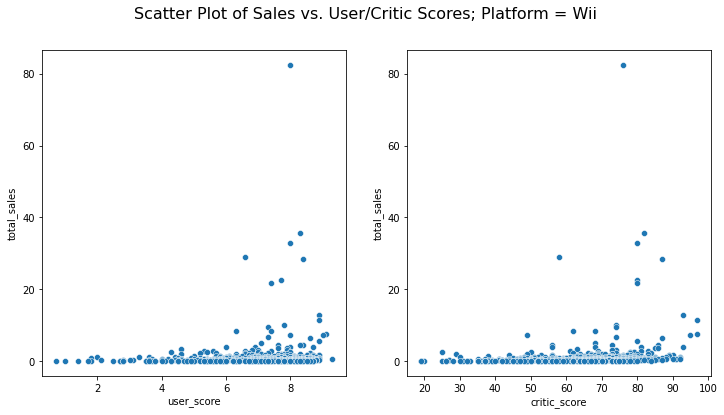

The correlation between user_score and total sales is: 0.11
The correlation between critic_score and total sales is: 0.17


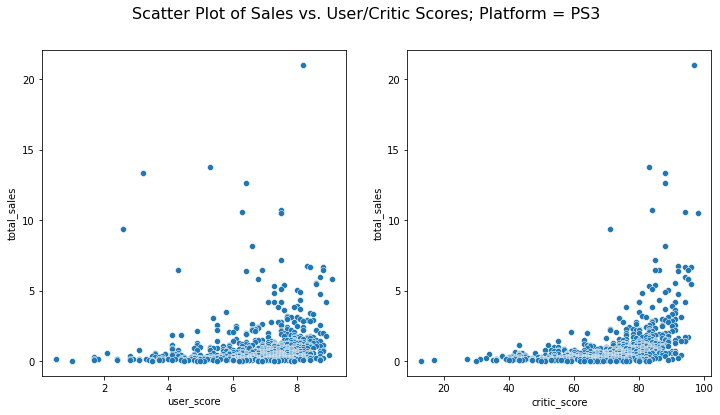

The correlation between user_score and total sales is: 0.14
The correlation between critic_score and total sales is: 0.43


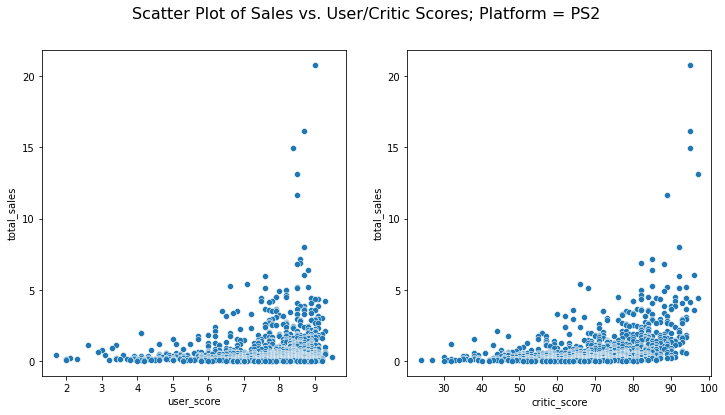

The correlation between user_score and total sales is: 0.17
The correlation between critic_score and total sales is: 0.39


In [54]:
def review_effect(platform):
    
    if platform != 'X360':
        platform_data = score_data.loc[score_data['platform'] == platform]
        review_types = ['user_score','critic_score']

    #build scatter plot
        fig, ax = plt.subplots(1, 2,figsize=(12,6))
        fig.suptitle("Scatter Plot of Sales vs. User/Critic Scores; Platform = {}".format(platform), fontsize=16)

        sns.scatterplot(x='user_score', y="total_sales", data=platform_data,ax=ax[0])
        sns.scatterplot(x='critic_score', y="total_sales", data=platform_data,ax=ax[1])
    
        plt.show()
    
    #Calculate correlations and print results
        print('The correlation between user_score and total sales is: {:.2f}'.format(platform_data['user_score'].corr(platform_data['total_sales'])))
        print('The correlation between critic_score and total sales is: {:.2f}'.format(platform_data['critic_score'].corr(platform_data['total_sales'])))  
    
for i in top_6:
    review_effect(i)

#### Conclusions:
- Sales are almost always positively and medium correlated with critic score.

- Sales are only slightly positively correlated with user score, except for the PS platform, where user scores are also positively medium correlated with total sales.

- In general, sales are more correlated with critic scores than user scores.

- Sales for 'Wii' are the least correlated and are only slightly correlated with user or critic scores.

- This additional test supports my conclusions from analysing 'X360' platform, which said that the impact of scores on games sales is not high, and nevertheless is higher for critic (professionals) scores. 

###  Take a look at the general distribution of games by genre. 
- What can we say about the most profitable genres? 
- Can you generalize about genres with high and low sales?

In [55]:
genres_total_sales = games_2013.groupby('genre')['total_sales'].sum().sort_values().index
games_2013.groupby('genre')['total_sales'].sum().sort_values()

genre
Puzzle            3.17
Strategy         10.08
Simulation       21.76
Adventure        23.64
Fighting         35.31
Racing           39.89
Platform         42.63
Misc             62.82
Role-Playing    145.89
Sports          150.65
Shooter         232.98
Action          321.87
Name: total_sales, dtype: float64

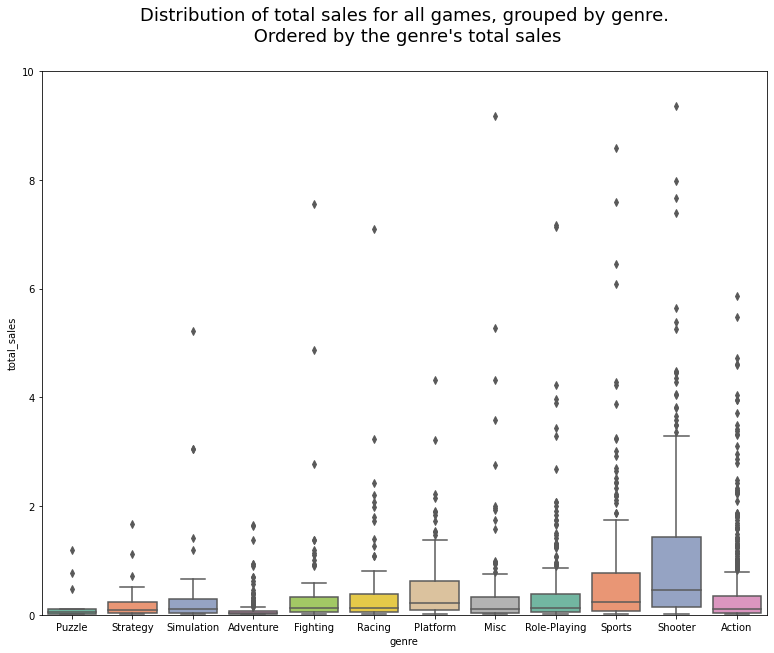

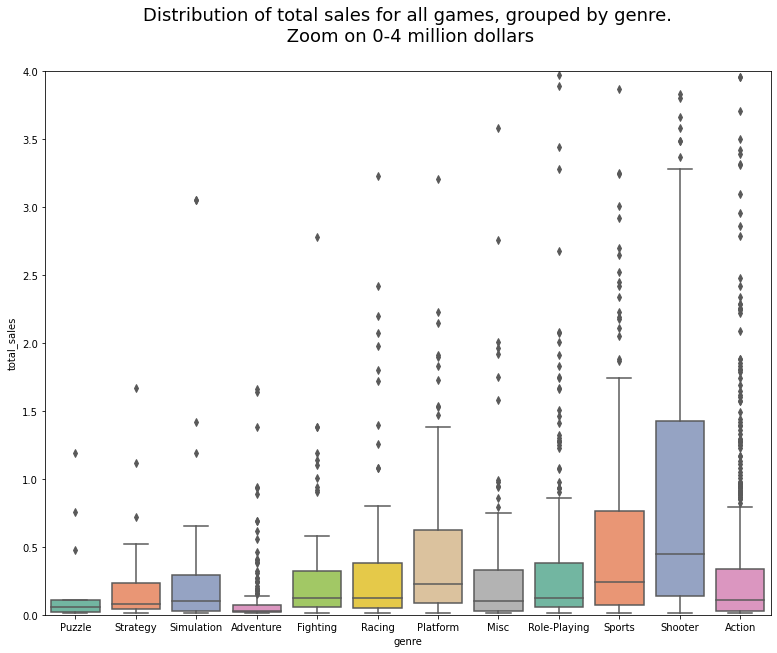

In [56]:
plt.figure(figsize=(13, 10))
ax = sns.boxplot(
    x="genre",
    y="total_sales",
    data=games_2013,
    palette="Set2",
    order=genres_total_sales
)

title = f"Distribution of total sales for all games," \
f" grouped by genre.\n Ordered by the genre's total sales"
plt.title(title,size=18,pad=30);
plt.ylim(0, 10)
plt.show()

plt.figure(figsize=(13, 10))
ax = sns.boxplot(
    x="genre",
    y="total_sales",
    data=games_2013,
    palette="Set2",
    order=genres_total_sales
)

print()
title = f"Distribution of total sales for all games," \
f" grouped by genre.\n Zoom on 0-4 million dollars"
plt.title(title,size=18,pad=30);
plt.ylim(0, 4)
plt.show()

In [57]:
# group by platform
genres_total_sales = games_2013.groupby('genre')['total_sales'].sum().sort_values().reset_index()
ordered = genres_total_sales['genre']

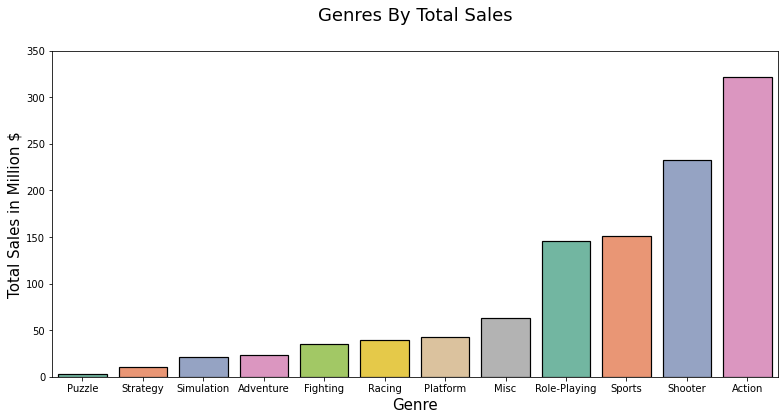

In [58]:
# Plot bar plot of total sales by genres
plt.figure(figsize=(13,6))
sns.barplot(
    x='genre',
    y='total_sales',
    data=genres_total_sales,
    order=ordered,
    palette="Set2",
    edgecolor='k',
    lw=1.2
)
title = f"Genres By Total Sales"
plt.title(
    title,
    size=18,
    pad=30,
);
plt.ylim(0, 350)
plt.ylabel('Total Sales in Million $', fontdict = {'size':15})
plt.xlabel('Genre', fontdict = {'size':15})
plt.show()

#### Conclusions:
- From the box plot graph we can learn about the distribuion of games by genre. 
- We can see that the most profitable genres, Action and Shooter, have different kinds of distributions: 
 - Action games have low median and high degree of peakedness with long positive tail. 
 - while Shooter games have the highest median total sales of all genres and low degree of peakedness with longest positive tail. 

- The top selling genres are of games marked with intense activity and more physical attitude.

- The lower selling genres such as puzzle, strategy, simulation and adventure are typically slower, build on stories and thinking.

- The leading genres in terms of total sales (like Action) are not nessicerly leading in terms of the median total sales. it means that their sales are composed of many games with lower total sales In opposite to other genres composed of less games but more bestsellers games  

##  Create a user profile for each region
- For each region (NA, EU, JP), determine:

### The top five platforms. Describe variations in their market shares from region to region.

In [59]:
# Determine top 5 platforms
sales_by_platform = games_2013.groupby(['platform'])['total_sales'].sum().sort_values()
top_5_platforms = sales_by_platform.tail(5)
top_5_platforms.index

Index(['X360', '3DS', 'XOne', 'PS3', 'PS4'], dtype='object', name='platform')

In [60]:
# filter only top 5 platforms
games_2013_top_platforms = games_2013.query('platform in @top_5_platforms.index')

##### Manualy ploting each region

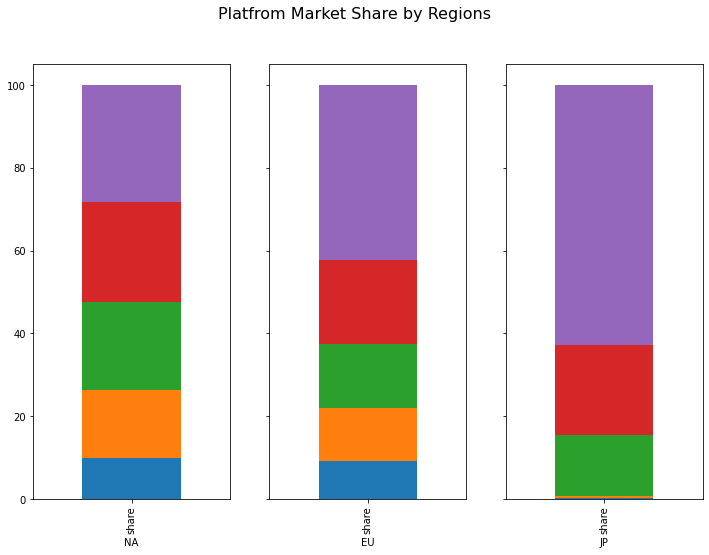

In [61]:
# Here I succeded in ploting the graphs sorted by market share, but I didn't manage to plot a legend
# I have changed it to function, but left this code for future use...

# create variable for each region, grouped by platform
na_total_sales = games_2013_top_platforms.groupby('platform')['na_sales'].sum().sort_values().reset_index()
eu_total_sales = games_2013_top_platforms.groupby('platform')['eu_sales'].sum().sort_values().reset_index()
jp_total_sales = games_2013_top_platforms.groupby('platform')['jp_sales'].sum().sort_values().reset_index()

# calculate platfrom market share
na_total_sales['share'] = (na_total_sales['na_sales']/(na_total_sales['na_sales'].sum())*100)
eu_total_sales['share'] = (eu_total_sales['eu_sales']/(eu_total_sales['eu_sales'].sum())*100)
jp_total_sales['share'] = (jp_total_sales['jp_sales']/(jp_total_sales['jp_sales'].sum())*100)

na_transpose = na_total_sales['share'].to_frame().T
eu_transpose = eu_total_sales['share'].to_frame().T
jp_transpose = jp_total_sales['share'].to_frame().T

fig, ax = plt.subplots(1, 3,figsize=(12,8),sharey=True)
fig.suptitle("Platfrom Market Share by Regions ", fontsize=16)

na_transpose.plot(kind='bar', stacked=True,ax=ax[0],legend=False,xlabel='NA')

eu_transpose.plot(kind='bar',stacked=True,ax=ax[1],legend=False,xlabel='EU');

jp_transpose.plot(kind='bar',stacked=True,ax=ax[2],legend=False,xlabel='JP');

plt.show()

In [62]:
# Defining function that calculates market share by region per dynamic key

def split_and_join(string, split_on="_"):
    return " ".join(string.split(split_on))

def plot_market_share_by_region(df, feature, ax, regions=['na_sales', 'eu_sales', 'jp_sales']):

    # Grouping the data by feature
    grouped_by_feature = df.groupby(feature).sum()
    market_share = grouped_by_feature[regions]
    
    # Calculate market share per region
    for column in market_share.columns[:3]: 
        market_share[column] = (market_share[column]/market_share[column].sum())*100
        
    # Prepering for ploting 
    transpose = market_share.T
    
    transpose.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        legend=False
    );

    # ylabel
    ylabel = "Relative market share"
    ax.set_ylabel(
        ylabel,
        labelpad=18,
        size=16,
        
    )
     # xlabel
    ax.set_xlabel(
        'regions',
        labelpad=18,
        size=16,
        
    )

    # xticks
    xticks_positions = ax.get_xticks()
    xtick_labels = [split_and_join(label.get_text()) for label in ax.get_xticklabels()]
    ax.set_xticks(
        ticks=xticks_positions,
    );
    ax.set_xticklabels(
        labels=xtick_labels,
        rotation=0
    )
    ax.tick_params(
        pad=10,
        bottom=False,
        top=False,
        
    )
    # A figure legend
    handles, labels = ax.get_legend_handles_labels()
    plt.gcf().legend(
        handles,
        labels,
        loc='upper left',
        bbox_to_anchor=(1, 1.02),
        bbox_transform=ax.transAxes
    )
    
    return ax

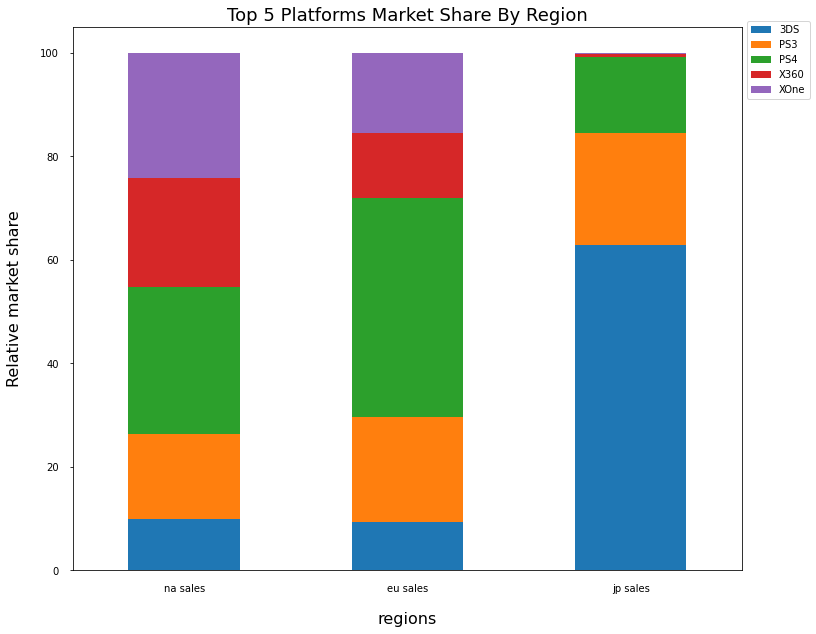

,na_sales,eu_sales,jp_sales
platform,,,
3DS,9.916411,9.270294,62.804483
PS3,16.484087,20.304219,21.626378
PS4,28.228026,42.24631,14.781884
X360,21.198276,12.731682,0.472353
XOne,24.1732,15.447495,0.314902


In [63]:
# Ploting platforms' market share per region

# Filtering only top 5 platforms:
games_2013_top_platforms = games_2013.query('platform in @top_5_platforms.index')

# plot bar chart
ax = plt.figure(figsize=(12, 10)).add_subplot()

print('')
plot_market_share_by_region(games_2013_top_platforms, 'platform', ax)
plt.title('Top 5 Platforms Market Share By Region', fontsize = 18)
plt.show()

pms = games_2013_top_platforms.groupby('platform').sum()/games_2013_top_platforms.sum()*100
pms[['na_sales','eu_sales','jp_sales']]

#### Conclusions:

- In North America and Europe:
 - PlayStation platform versions PS3 and PS4 are leading the market. their share is much higher in the EU then in NA (62% and 45% Respectively)
 - next is XBox platform with the erlier version X360 and the new XOne (EU - around 28%, NA - around 50%)
 - lowest in market share is 3DS (Nintendo portable game consule) - around 10%
- In Japan:
 - Nintendo 3DS is leading with 63% of market share!
 - next are Playstation platforms (around 35%)
 - XBox platform market share is almost ignorable (less then 1%)

### The top five genres. 
- Explain the difference.

In [64]:
# Determine top 5 genres
sales_by_genre = games_2013.groupby(['genre'])['total_sales'].sum().sort_values()
top_5_genres = sales_by_genre.tail(5)
top_5_genres.index

Index(['Misc', 'Role-Playing', 'Sports', 'Shooter', 'Action'], dtype='object', name='genre')

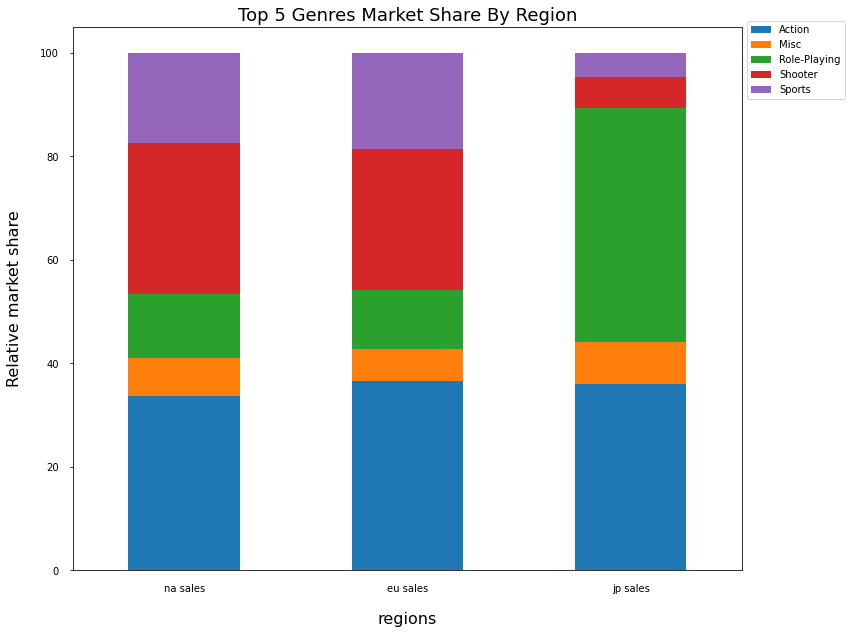

,na_sales,eu_sales,jp_sales
genre,,,
Action,33.617816,36.513971,35.911308
Misc,7.331644,6.194362,8.159645
Role-Playing,12.374983,11.427423,45.268293
Shooter,29.267902,27.157517,5.862528
Sports,17.407654,18.706726,4.798226


In [65]:
# Ploting genres' market share per region

# Filtering only top 5 genres:
games_2013_top_genres = games_2013.query('genre in @top_5_genres.index')

# plot bar chart
ax = plt.figure(figsize=(12, 10)).add_subplot()

print('')
plot_market_share_by_region(games_2013_top_genres, 'genre', ax)
plt.title('Top 5 Genres Market Share By Region', fontsize = 18)
plt.show()
ms = games_2013_top_genres.groupby('genre').sum()/games_2013_top_genres.sum()*100
ms[['na_sales','eu_sales','jp_sales']]

#### Conclusions:

- In North America and Europe:
 - The genres market share is quite simillar between NA and UE - action and shooter take the largest share (around 35% and 28% respectively)  
 - next are sports games (around 18%)
 - lowest in market share are role-playing and miscellaneous genres (with around 12% and 6% respectively)
- In Japan:
 - playing genre is leading with more around 45% of market share!
 - next is action (around 35%)
 - miscellaneous with 8%
 - and last in market share are shooter and sports games with around 5% each
 
##### There is a significant difference in genres sales between North America/Europe and Japan: 
- NA/UE gamers prefare action and shooter games, and in the second place, sports games.
- while Japan's gamers mostly like roll-playing games, moderatly like action games and does not like sports and shooter games.

### Do ESRB ratings affect sales in individual regions?

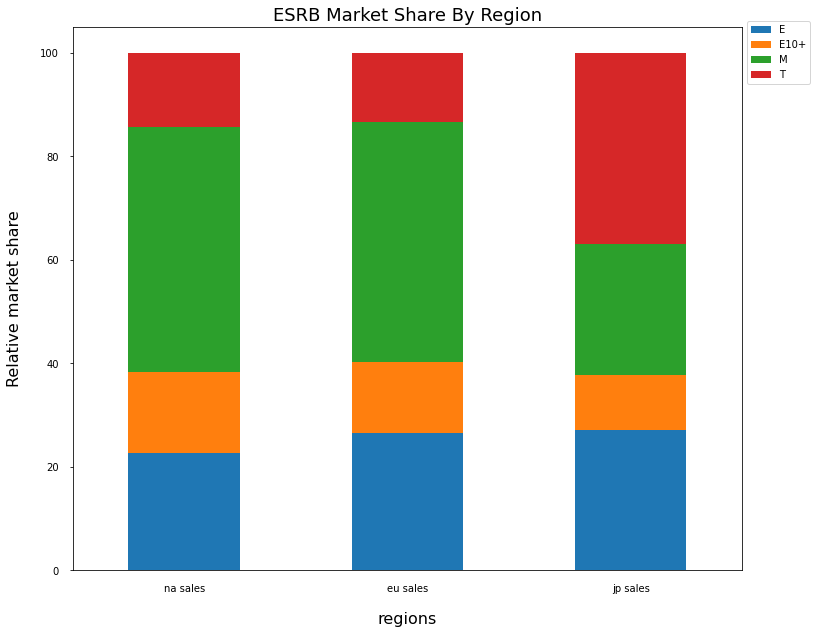

,na_sales,eu_sales,jp_sales
rating,,,
E,22.696603,26.605387,27.166697
E10+,15.573229,13.625048,10.568814
M,47.434609,46.380697,25.3185
T,14.295558,13.388868,36.94599


In [66]:
# Ploting ESRB market share per region

# Prepering the data
total_sales_by_rating = games_2013.query('rating != "Unknowen"')

# plot bar chart
ax = plt.figure(figsize=(12, 10)).add_subplot()

print('')
plot_market_share_by_region(total_sales_by_rating, 'rating', ax)
plt.title('ESRB Market Share By Region', fontsize = 18)
plt.show()

msr = total_sales_by_rating.groupby('rating').sum()/total_sales_by_rating.sum()*100
msr[['na_sales','eu_sales','jp_sales']]

#### Conclusions:
- In North America and Europe:
 - The market is divided quite the same:
 - The M (Mature) category games takes the biggest market share with around 47%
 - E (Everyone) is next with 27% in EU and 23% in NA
 - E10+ (Everyone 10+) and T (Teen) takes around 13% in EU and 15% in NA 
- In Japan:
 - T(een) roling the market with around 37% market share
 - M(ature) and E(veryone) with 25% and 27% respectively
 - E10+ has the smallest market share, around 10%


##### There is a significant difference in ESRB categories sales between North America/Europe and Japan

## Test the following hypotheses:

### Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
H0: The average user rating of Xbox One equals the average user rating of PC

+ H0: 𝜇_1=𝜇_2; Average user review score is equal between XOne and PC platforms.

+ H1: 𝜇_1!=𝜇_2; Average user review score is different between XOne and PC platforms

In [67]:
# Prepering the data sets
score_data_2013 = games_2013.query('critic_score !=0 & user_score !=0')
xbox_one_score = score_data_2013.query('platform == "XOne"')
pc_score = score_data_2013.query('platform == "PC"')

In [68]:
# In order to determine if the samples have the same variance we will run levene test
from scipy.stats import levene

#Ho: σ_1=σ_2

#H1: σ_1!=σ_2
    
alpha = 0.05  # critical statistical significance level

stat, p = levene(xbox_one_score['user_score'], pc_score['user_score'], center='mean')
print('p=', p)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p= 0.0006481351506821842
We reject the null hypothesis


In [69]:
# For testing the hypothesis we will run ttest (comparing means with unknown variance) for 2 independent samples 
# The assumption on the equality of the samples variance was rejected
# so we add the parameter equal_var = False
from scipy import stats as st
import numpy as np

alpha = 0.05  # critical statistical significance level

# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(xbox_one_score['user_score'], pc_score['user_score'], equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.17882648263401307
We can't reject the null hypothesis


#### Conclusion:
- We can't reject the null assumption on the equality of user score means of the two samples.
- We can say that there is a significant (18%) probability of randomly getting a difference the size we got between the sumples means. 
- This probability is too high to conclude that there is a difference between the average user scores of Xbox_one and PC platforms games.
- Therefore we conclude that average user score is equal between Xbox One and PC platforms.

### Hypothesis: Average user ratings for the Action and Sports genres are different.
H0: The average user rating for action genre equals the average user rating for sports genre

+ _H0_: 𝜇_1=𝜇_2;  Average user review score is **equal** between Action and Sports genres.
+ _H1_: 𝜇_1!=𝜇_2; Average user review score is **different** between Action and Sports genres.

In [70]:
# Prepering the data sets
action_score = score_data_2013.query('genre == "Action"')
sports_score = score_data_2013.query('genre == "Sports"')

In [71]:
# In order to determine if the samples have the same variance we will run levene test
from scipy.stats import levene

#Ho: σ_1=σ_2

#H1: σ_1!=σ_2
    
alpha = 0.05  # critical statistical significance level

stat, p = levene(action_score['user_score'], sports_score['user_score'], center='mean')
print('p=', p)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p= 0.06960070315865954
We can't reject the null hypothesis


In [72]:
# For testing the hypothesis we will run ttest (comparing means with unknown variance) for 2 independent samples 
# The assumption on the equality of the samples variance was not rejected
from scipy import stats as st
import numpy as np

alpha = 0.05  # critical statistical significance level

# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(action_score['user_score'], sports_score['user_score'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.684099430689953e-16
We reject the null hypothesis


#### Conclusion: 
- We rejected the null assumption on the equality of user score means of the two platforms.
- We can say that there is a very small probability of randomly getting a difference the size we got between the sample means.
- This probability is clearly too small to conclude that there is no difference between the average user scores of the two genres.
- Therefore we conclude that average user score is not equal between Action and Sports genres.

### Explain:
#### How you formulated the null and alternative hypotheses
- Explained above

#### What significance level you chose to test the hypotheses, and why
- I choosed alpha = 0.05, because this is the common value for this kind of tests

## Write a general conclusion

### Project description

We received data from an online store selling video games all over the world.
The project goal was to identify patterns that determine whether a game succeeds or not.

### General overview of the data

The raw data is an aggregated data set with 16,606 records, each one summing up the sales of a particular product.  
The data spans 36 years from 1980-2016.

### Pre-processing
Data was pre-processed before further analysis.


#### Data types and scaling of review scores
-   Data types were converted where required.


#### Missing values
-   Data contained a large number of missing values (~50%) in the Critic and User score columns. These missing values were assumed to be a result of actual data not being available. they were filled with 0 and filtered out when analysing the scores.
-   A very small fraction (<2%) of the data had missing values for the year of release. These were also filled with 0.

### Analysis

#### Distribution of games released by year
- until around 1994 the number of games release was very low (less then 100 a year).
- From 1995 there was a gradual yearly increase in the number of games until the large jump in 2002, could represent technological jump in the gaming industry. a consistant growing followed this jump until 2010, where we see a decrease in the number of new games released every year.
- My hypothesis is that the industry changed from many small games market into more consolidated market around some big blockbusters. 

####  Platforms popularity by total sales
- The 6 highest all times saleing platforms, which are standing high above the avarage sales are: PS2, X360, PS3, Wii, DS, PS;

####  What is the life cycle of a game platform?

- The cycle from appearing to fading generally takes about 10-11 years. 
- we observed various platforms that have come and gone, and others platforms that are still alive and will be relevant for making predictions for the near future.

#### What period?
In order to build prognosis for 2017, based on the dynamics of platforms sales and that of total games released by year, I decided to take data from the last 4 years (2013-2016). before that year most platforms that were top sellers had allready faded away and around that time the newer version that had succeded them has been introduced.

#### Focus the analysis on top saleing platforms
- PS4 and XOne are leading in sales since 2014. 3DS is in the 3'rd place.

- We couldn't see a significant difference in the median of games' total sales between the platforms. most of the games' total sales were low.
- We spotted big difference in the dispersion of the data: the platforms that lead the market have positively tailed distribution, with many outliers ("blockbuster" games). these are the games that pull up the average and total sales of the paltforms.
- analysis of the avarage sales supported the assumption that strong games (blockbusters) influence the avarage and the total sales of the platforms 

####  We tested how user and professional reviews affect sales for X360 platform. 
- Sales are almost always positively and medium correlated with critic score.
- Sales are only slightly positively correlated with user score.
- In general, sales are more correlated with critic scores than user scores.
- A possible explanation to the difference in correlation could be that proffetionals' score has more impact, since customer appreciate it more. it is more solid and based on set of parameters. In contrast to users' score, which is subjective.
- This assumption has been supported by testing the scores' correlation with other platfroms sales.

####  General distribution of games by genre. 
- The top selling genres are of games marked with intense activity and more physical attitude (action, shooter, sports).
- The lower selling genres such as puzzle, strategy, simulation and adventure are typically slower, build on stories and thinking.
- The leading genres in terms of total sales (like Action) are not nessicerly leading in terms of the median total sales. it means that their sales are composed of many games with lower total sales, in opposite to other genres composed of less games but more bestsellers games  

###  Analyse user profile for each region

#### Platforms market share
In North America and Europe:
- PlayStation platform versions PS3 and PS4 are leading the market in both EU and NA (62% and 45% Respectively)
- next is XBox platform with the erlier version X360 and the new XOne (EU - around 28%, NA - around 50%)
- lowest in market share is 3DS (Nintendo portable game consule) - around 10%
In Japan:
- Nintendo 3DS is leading with 63% of market share!
- next are Playstation platforms (around 35%)
- XBox platform market share is almost ignorable (less then 1%)

#### Genres market share 
- In North America and Europe:
 - The genres market share is quite simillar between NA and UE - action and shooter take the largest share (around 35% and 28% respectively)  
 - second are sports games (around 18%)
 - lowest in market share are role-playing and miscellaneous genres (with around 12% and 6% respectively)
- In Japan:
 - playing genre is leading with more around 45% of market share!
 - second is action (around 35%)
 - miscellaneous with 8%
 - and last in market share are shooter and sports games with around 5% each
 
- NA/UE gamers prefare action and shooter games, and in the second place, sports games.
- while Japan's gamers mostly like roll-playing games, moderatly like action games and does not like sports and shooter games.

#### How ESRB ratings affect sales
- In North America and Europe:
 - The market is divided quite the same:
 - The Mature category games takes the biggest market share with around 47%
 - E (Everyone) is next with 27% in EU and 23% in NA
 - E10+ (Everyone 10+) and T (Teen) takes around 13% in EU and 15% in NA 
- In Japan:
 - T(een) rolling the market with around 37% market share
 - M(ature) and E(veryone) with 25% and 27% respectively
 - E10+ has the smallest market share, around 10%

### Hypothesis testing
#### Hypothesis1: Average user ratings of the Xbox One and PC platforms are the same.
- We can't reject the null assumption on the equality of user score means of the two samples.
- Therefore we conclude that average user score is equal between Xbox One and PC platforms.

#### Hypothesis: Average user ratings for the Action and Sports genres are different.
- We rejected the null assumption on the equality of user score means of the two platforms.
- Therefore we conclude that average user score is not equal between Action and Sports genres.

### Recommendations
My recommendations on potential big winners and advertising campaigns planning are divided between NA&EU markets and the JP market:

#### NA&EU
- PS4 and XOne are the platform that lead the market now and worth attention. they share the market and like the hypothesis testing showed, they get the same avarage user rating 
- Gamers prefare action and shooter games, and in the second place, sports games - action and activity leads. like the hypothesis testing showed, action and sports game get different user score
- Mature category games first and then E (Everyone) category are mostly demended

#### Japan
- The platform that lead the market now is the portable 3DS. 
- Gamers mostly like roll-playing games, moderatly like action games and does not like sports and shooter games.
- Teen and E categorized games are highly popular in japan Compared with other regions
 
#### 
- In general, sales are positivly correlated with critic scores. so, following the critics scores can help in getting better forcast of games sales. 